In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

plt.rcParams.update({"text.usetex":True})

In [2]:
data_idx = '000'

dir_data = os.getcwd() + '/saved_data/data_' + data_idx
print(dir_data)

/home/rkaushik/Documents/Thesis/MLROM/new_ks/saved_data/data_000


In [3]:
with np.load(dir_data + '/data.npz') as f:
    lyapunov_spectrum_mat = f['lyapunov_spectrum_mat']
print(lyapunov_spectrum_mat)

[[ 6.46567031e-02  3.94599755e-02  1.17152065e-02  6.73091546e-03
  -2.59586820e-03 -7.01975949e-03 -2.02236855e-02 -1.01745230e-01
  -1.92770995e-01 -2.50777575e-01 -3.21525809e-01 -3.88338071e-01
  -4.86927786e-01 -5.66797261e-01 -6.09686537e-01 -2.00492342e+00
  -2.00926124e+00 -4.08761879e+00 -4.08785091e+00 -7.07586587e+00
  -7.07925952e+00 -1.12375426e+01 -1.12396928e+01 -1.36202971e+01
  -1.38316547e+01 -1.39079976e+01 -1.39763363e+01 -1.40099386e+01
  -1.40561551e+01 -1.40854790e+01 -1.41220472e+01 -1.41446577e+01
  -1.41802895e+01 -1.42159725e+01 -1.42371685e+01 -1.42660025e+01
  -1.43045027e+01 -1.43255219e+01 -1.43526074e+01 -1.43906654e+01
  -1.44233427e+01 -1.44513451e+01 -1.44829068e+01 -1.45117074e+01
  -1.45505678e+01 -1.45808416e+01 -1.46197755e+01 -1.46494782e+01
  -1.47033001e+01 -1.47452059e+01 -1.47888083e+01 -1.48305350e+01
  -1.48895112e+01 -1.49447819e+01 -1.49980011e+01 -1.50505156e+01
  -1.51442049e+01 -1.52313031e+01 -1.53368666e+01 -1.54426309e+01
  -1.56144

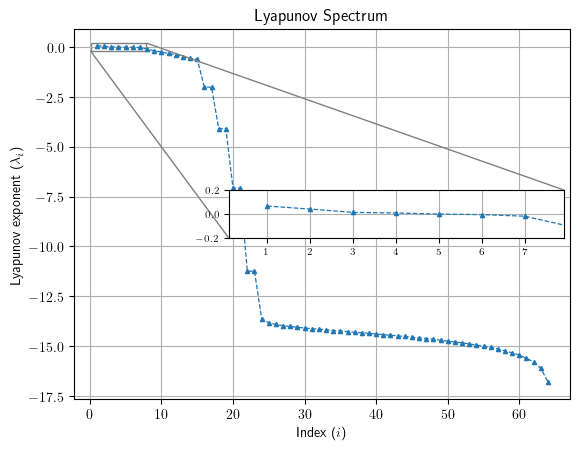

In [30]:
plt.plot(np.arange(1, len(lyapunov_spectrum_mat[0])+1), lyapunov_spectrum_mat[0], '--', marker='^', linewidth=0.9, markersize=3)
plt.ylabel(r'Lyapunov exponent ($\lambda_i$)')
plt.xlabel(r'Index ($i$)')
plt.title(r'Lyapunov Spectrum')
plt.grid(True)

ax = plt.gca()
# ax_inset = ax.inset_axes(ax, zoom=2, loc=7)
ax_inset = zoomed_inset_axes(ax, zoom=6, loc=7)

ax_inset.plot(np.arange(1, len(lyapunov_spectrum_mat[0])+1), lyapunov_spectrum_mat[0], '--', marker='^', linewidth=0.9, markersize=3)
ax_inset.set_xlim(0.1, 7.9)
ax_inset.set_ylim(-0.2, 0.2)
ax_inset.grid(True)
ax_inset.tick_params(axis='both', which='major', labelsize=7)

mark_inset(ax, ax_inset, loc1=1, loc2=3, fc="none", ec="0.5")

plt.savefig(dir_data+'/plots/lyapunov_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
DKY_lst = []
for i in range(lyapunov_spectrum_mat.shape[0]):
    lp_spec = lyapunov_spectrum_mat[i]
    lp_spec_cumsum = np.cumsum(lp_spec)
    idx = np.where(lp_spec_cumsum >= 0)[0]
    idx = np.max(idx)
    DKY = idx+1 + lp_spec_cumsum[idx]/np.abs(lp_spec[idx+1])
    DKY_lst.append(DKY)
    
print('DKY_lst : ', DKY_lst)
print('MLE : ', lyapunov_spectrum_mat[:, 0])
print('lp_time : ', 1/lyapunov_spectrum_mat[:, 0])

DKY_lst :  [7.911330072779956]
MLE :  [0.0646567]
lp_time :  [15.4663005]


In [6]:
lp_dict = {
    'DKY_lst':list(DKY_lst),
    'MLE_lst':list(lyapunov_spectrum_mat[:, 0]),
    'lp_time':list(1/lyapunov_spectrum_mat[:, 0])
}
with open(dir_data+'/lyapunov_details.txt', 'w') as f:
    f.write(str(lp_dict))